In [39]:
import os
import pandas as pd
import dask.bag as db
import json
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = [8.0, 6.0]
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = "Serif"

In [9]:
model = 'owr'

In [97]:
df = pd.read_csv('/home/nyu/eddyhu/{0}-1318.csv'.format('owr'))

In [10]:
records = db.read_text('/home/nyu/eddyhu/pin-estimates/{0}/*.json'.format(model)).map(json.loads)

In [11]:
ddf = records.to_dataframe()
df = ddf.compute()

In [27]:
df.set_index('permno yyyy'.split(),inplace=True)

In [71]:
sum(df.rc!=0 | pd.isnull(df.f!=0)), len(df), sum(df.rc!=0 | pd.isnull(df.f!=0))/len(df)

(16, 13462, 0.0011885306789481504)

In [99]:
df['permno yyyy a su sz si spd spo'.split()].to_csv('/home/nyu/eddyhu/{0}-1318-1.csv'.format('owr'), index=False)

In [98]:
df[:10]

,permno,yyyy,a,f,rc,si,spd,spo,su,sz
0,10001,2013,0.409462,2228.456458,0,0.021127,0.000010,0.004641,0.049575,0.263581
1,10001,2014,0.680836,2162.843694,0,0.019696,0.007194,0.000010,0.051543,0.235071
2,10001,2015,0.585289,2021.857713,0,0.030100,0.000010,0.000010,0.058660,0.263416
3,10001,2016,0.579142,865.395311,0,0.000010,0.160831,0.160275,0.013569,0.278579
4,10028,2013,0.728697,1782.002100,0,0.030041,0.009538,0.000010,0.183421,0.408074
5,10028,2015,0.711217,1414.665603,0,0.014519,0.032731,0.030815,0.319380,0.000241
6,10028,2017,0.698898,1748.542522,0,0.038558,0.013120,0.000015,0.024876,0.321567
7,10028,2018,0.578667,1638.610993,0,0.010797,0.032222,0.029332,0.221153,0.000164
8,10044,2013,0.757101,1993.379709,0,0.022782,0.000010,0.000010,0.048904,0.324955
9,10044,2014,0.526976,1814.065985,0,0.027704,0.014230,0.000010,0.079093,0.323292


In [60]:
df.loc[df.rc != 0 | pd.isnull(df.f)]

,,a,d,eta,f,p,r,rc,th
permno,yyyy,,,,,,,,
10645,2014,0.334737,0.288410,1.000000,11889.897140,0.999898,0.245636,3,0.146371
12440,2014,0.000010,0.193926,0.930376,6506.042143,0.998116,0.898388,3,0.373038
14545,2018,0.261069,0.104925,0.689655,5603.561091,0.997772,1.164720,3,0.362348
46834,2017,0.123235,0.335547,1.000000,2683.198316,0.975716,1.300286,3,0.190394
53373,2017,0.186674,0.507298,1.000000,4387.650909,0.998863,0.307885,3,0.244918
79066,2016,0.203829,0.242524,1.000000,5335.839394,0.999673,0.348039,3,0.439997
81225,2018,0.029573,0.947689,1.000000,4754.906150,0.996754,0.651996,3,0.326041
88258,2016,0.261941,0.252802,0.836735,3600.782119,0.995578,0.795674,3,0.325282
88462,2018,0.000014,0.762181,0.000010,210881.267140,0.999806,0.477768,2,0.159902


In [61]:
d = pd.read_hdf('/scratch/nyu/hue/taqdf_1318.h5', where='permno=={0} & yyyy=={1}'.format(11850,2017))
d[:10]

date ticker   n_buys  n_sells      ur_d      ur_o      uy_e
permno yyyy                                                                  
11850  2017 2017-01-03    XOM  33573.0  31278.0  0.000143  0.007876  0.026890
       2017 2017-01-04    XOM  27916.0  29035.0 -0.012716  0.011267 -0.006359
       2017 2017-01-05    XOM  38610.0  39960.0 -0.007498  0.014294 -0.004921
       2017 2017-01-06    XOM  32658.0  38264.0 -0.003820  0.025037 -0.071403
       2017 2017-01-09    XOM  36793.0  34862.0 -0.014799  0.007999  0.059086
       2017 2017-01-10    XOM  36160.0  38975.0 -0.008230  0.003480 -0.086413
       2017 2017-01-11    XOM  35722.0  36808.0  0.014172  0.010829 -0.020193
       2017 2017-01-12    XOM  32730.0  31002.0 -0.003681 -0.012429  0.026789
       2017 2017-01-13    XOM  24521.0  27422.0 -0.004518  0.016670 -0.065726
       2017 2017-01-17    XOM  37227.0  38122.0  0.004637  0.005622  0.015951

In [62]:
df.loc[df.rc==0].describe()

,a,d,eta,f,p,r,rc,th
count,11004.000000,11004.000000,11004.000000,1.100400e+04,11004.000000,11004.000000,11004.0,11004.000000
mean,0.421245,0.476252,0.308123,5.417204e+03,0.995180,4.966914,0.0,0.497291
std,0.166221,0.121856,0.287068,1.611988e+04,0.016115,12.798941,0.0,0.045660
min,0.000010,0.000564,0.000010,1.498813e+03,0.023421,0.254240,0.0,0.001078
25%,0.266571,0.405645,0.108987,3.887259e+03,0.995945,2.878969,0.0,0.489180
50%,0.493984,0.490845,0.161247,4.671219e+03,0.998648,4.638620,0.0,0.498540
75%,0.543214,0.543431,0.452262,5.709558e+03,0.999485,6.317135,0.0,0.507090
max,0.999990,0.999423,1.000000,1.369628e+06,0.999982,985.821894,0.0,0.997690


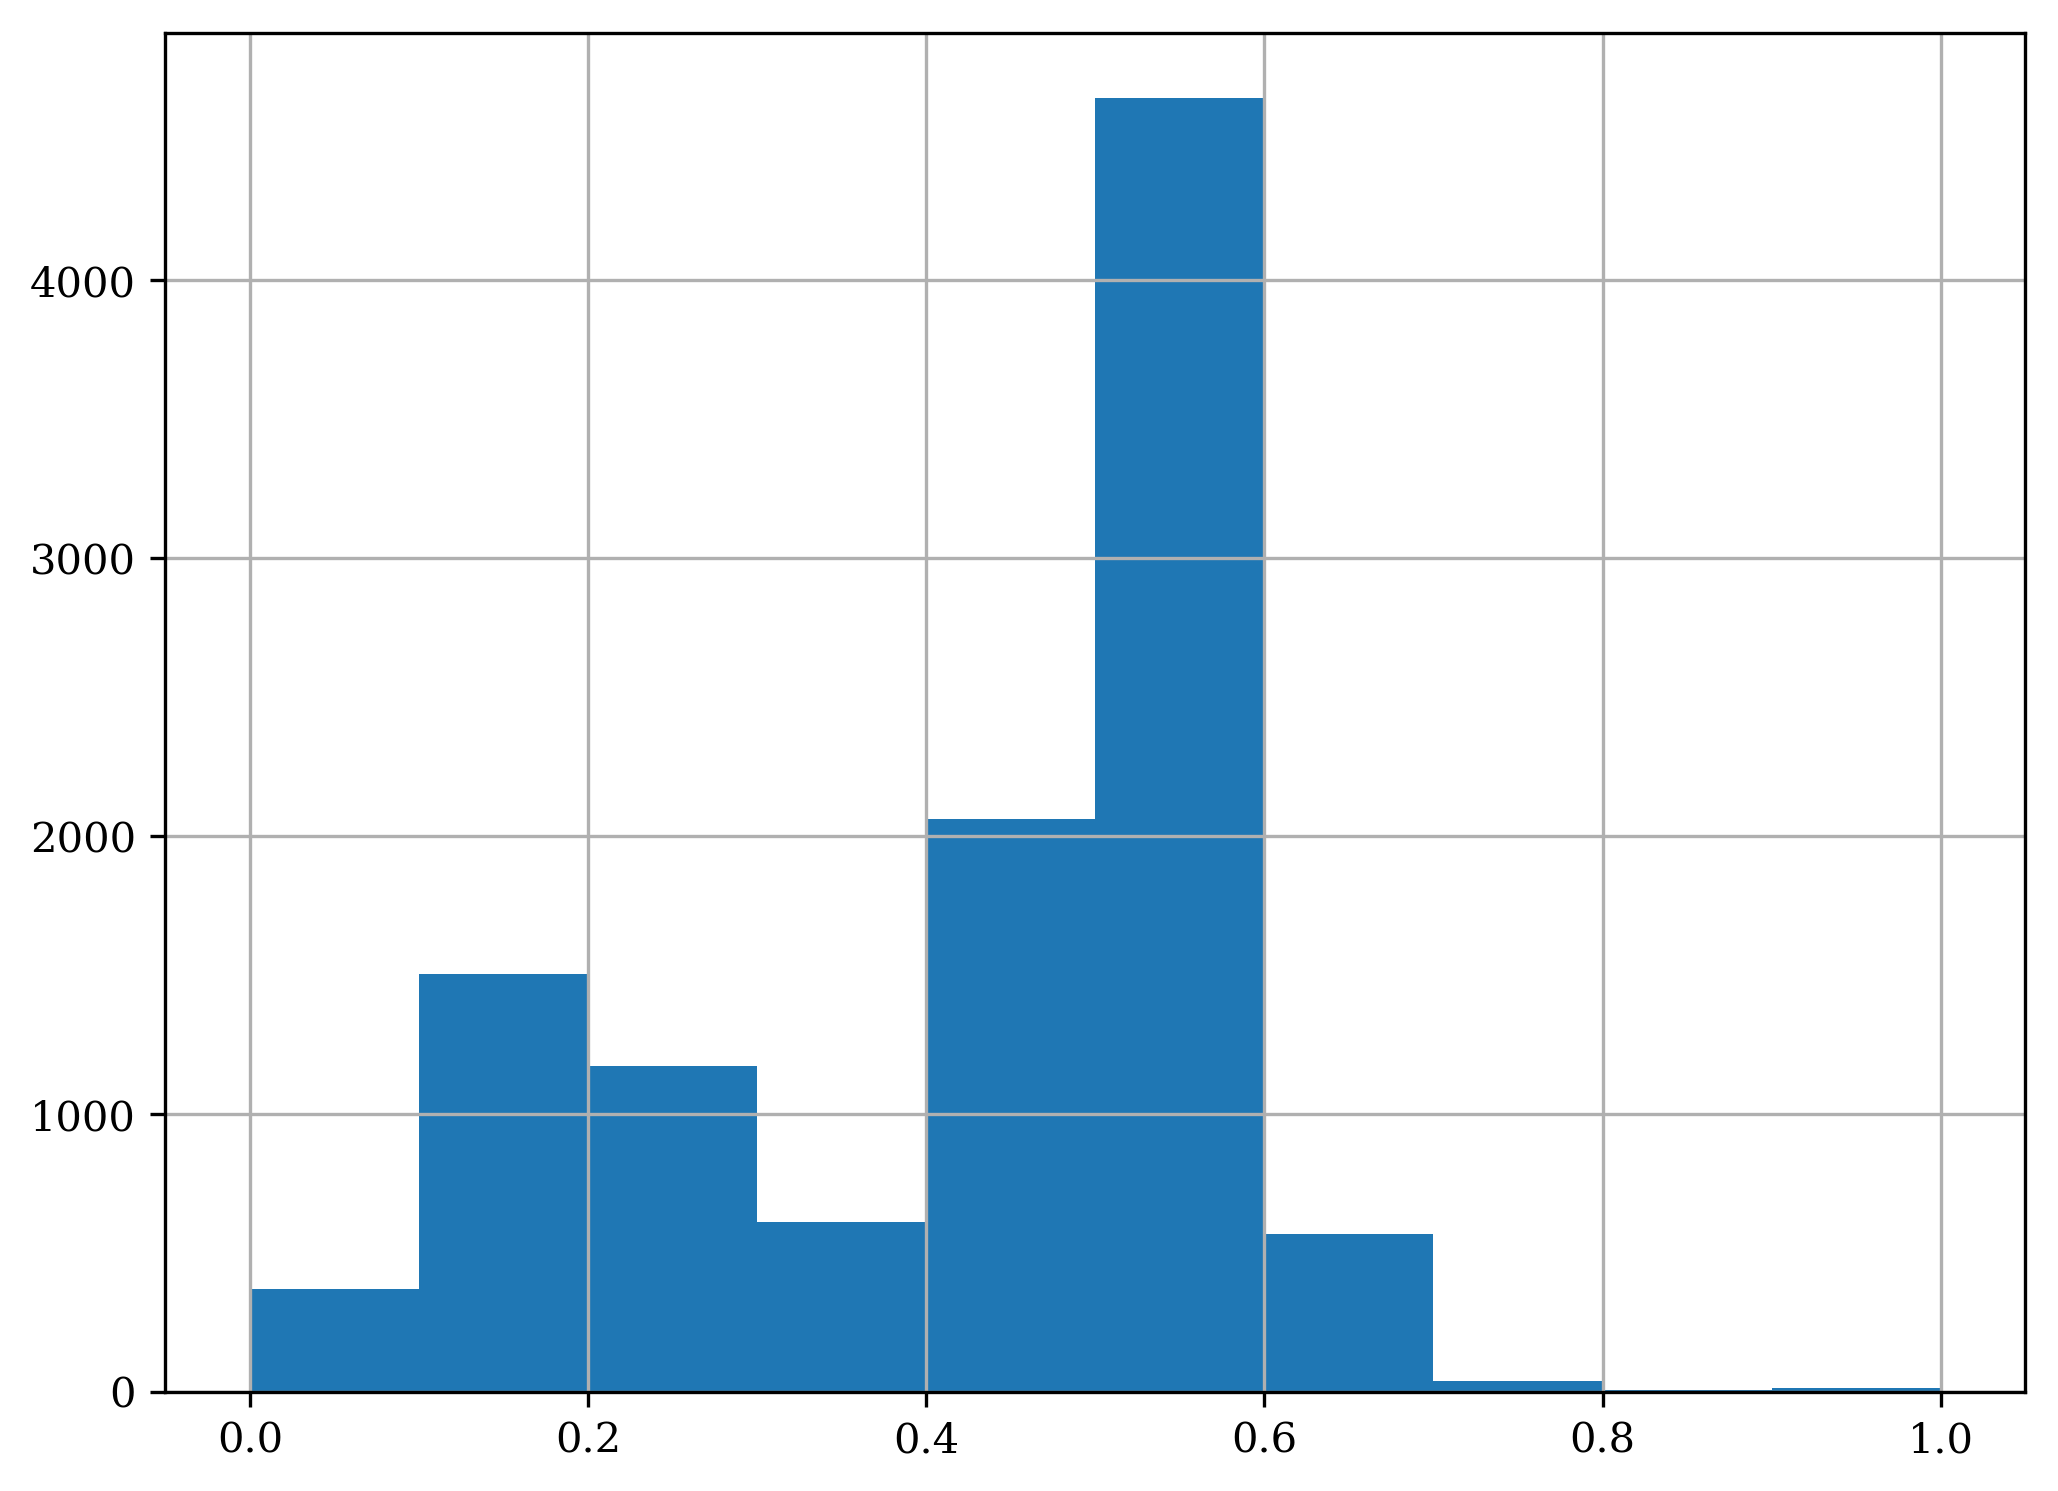

In [75]:
df.loc[df.rc==0].a.hist()

In [82]:
df.loc[11850,:]

,a,d,eta,f,p,r,rc,th
yyyy,,,,,,,,
2014,0.564332,0.498402,0.157970,18098.154427,0.999844,10.325100,0,0.492770
2015,0.548725,0.510383,0.049914,8025.985103,0.999892,8.652977,0,0.498125
2016,0.531837,0.761868,0.064901,10287.974397,0.999914,6.397532,0,0.488749
2017,0.575124,0.526025,0.054690,6780.149049,0.999773,12.233607,0,0.486088
2018,0.501663,0.498334,0.051075,7627.776371,0.999891,8.099398,0,0.498824


In [29]:
import gpin_model as gpin

In [93]:
def plot_gpin(permno, year):
    est = df.loc[permno,year]['a,r,p,eta,th,d'.split(',')].to_dict()
    d = pd.read_hdf('/scratch/nyu/hue/taqdf_1318.h5',
                        where='permno=={0} & yyyy=={1}'.format(permno, year))
    d['cpie_gpin'] = gpin.compute_alpha(n_buys=d.n_buys, n_sells=d.n_sells, **est)
    g = gpin.GPINModel(n=100, **est)
    fig,ax = plt.subplots()
    ax.scatter(x=g.buys.flatten(), y=g.sells.flatten(), alpha=0.1, color='k')
    d.plot(x='n_buys' ,y='n_sells', kind='scatter', 
           ax=ax, marker='x', c='cpie_gpin', colormap='cool', colorbar=False)
    
plot_gpin(11850,2018)

# Make

In [3]:
df = pd.read_sas('/scratch/nyu/hue/taqdf_1318x6.sas7bdat')
df['yyyy'] = df.yyyy.astype('int')
df['date'] = pd.to_timedelta(df.DATE, unit='D') + pd.Timestamp('1960-1-1')
df['permno'] = df.permno.astype('int')
df['ticker'] = df.SYMBOL_15.str.decode('UTF-8')
df.set_index('permno yyyy'.split(),inplace=True)

In [4]:
c = df.groupby(level=(0,1))\
    ['n_buys n_sells ur_d ur_o uy_e'.split()]\
    .count().min(axis=1)
c.name = 'count_min'

In [5]:
df1 = df.join(c)

In [6]:
df1[:10]

bm_log     me_log     DATE  TIME     y_eL1  CCPrcL1   omF1  \
permno yyyy                                                                 
10001  2013 -6.916689  11.239867  19360.0   0.0       NaN      NaN  9.555   
       2013 -6.916689  11.239867  19361.0   1.0  0.325301     9.58  9.465   
       2013 -6.916689  11.239867  19362.0   2.0 -0.450980     9.48  9.375   
       2013 -6.916689  11.239867  19365.0   3.0  0.000000     9.44  9.340   
       2013 -6.916689  11.239867  19366.0   4.0  0.000000     9.45  9.445   
       2013 -6.916689  11.239867  19367.0   5.0 -0.180000     9.39  9.555   
       2013 -6.916689  11.239867  19368.0   6.0  0.762712     9.59  9.800   
       2013 -6.916689  11.239867  19369.0   7.0  0.431034     9.89  9.825   
       2013 -6.916689  11.239867  19372.0   8.0 -0.084746     9.80  9.830   
       2013 -6.916689  11.239867  19373.0   9.0 -0.142857     9.77  9.880   

            SYM_ROOT SYM_SUFFIX  n_buys    ...          r_d       r_o  \
permno yyyy                                ...                          
10001  2013  b'EGAS'        NaN    55.0    ...    -0.000570  0.002667   
       2013  b'EGAS'        NaN    14.0    ...    -0.010112  0.000693   
       2013  b'EGAS'        NaN    20.0    ...    -0.010389  0.000881   
       2013  b'EGAS'        NaN    62.0    ...    -0.000521 -0.003213   
       2013  b'EGAS'        NaN    41.0    ...     0.008890  0.002352   
       2013  b'EGAS'        NaN   104.0    ...     0.008772  0.002874   
       2013  b'EGAS'        NaN    83.0    ...     0.035755 -0.010114   
       2013  b'EGAS'        NaN    27.0    ...     0.002609 -0.000058   
       2013  b'EGAS'        NaN    18.0    ...     0.000214  0.000295   
       2013  b'EGAS'        NaN    22.0    ...     0.000014  0.005072   

                alpha      beta      ur_o      ur_d      uy_e       date  \
permno yyyy                                                                
10001  2013 -0.000819  0.306945       NaN       NaN       NaN 2013-01-02   
       2013 -0.000819  0.306945 -0.000252 -0.009452 -0.469326 2013-01-03   
       2013 -0.000819  0.306945 -0.005612 -0.017486  0.077732 2013-01-04   
       2013 -0.000819  0.306945 -0.006330  0.000538 -0.010782 2013-01-07   
       2013 -0.000819  0.306945 -0.009283  0.010270 -0.186834 2013-01-08   
       2013 -0.000819  0.306945 -0.004628  0.010884  0.807184 2013-01-09   
       2013 -0.000819  0.306945 -0.012869  0.035853  0.266919 2013-01-10   
       2013 -0.000819  0.306945 -0.004743 -0.000612 -0.137523 2013-01-11   
       2013 -0.000819  0.306945 -0.002803 -0.001520 -0.132188 2013-01-14   
       2013 -0.000819  0.306945  0.002116  0.002175 -0.073611 2013-01-15   

             ticker count_min  
permno yyyy                    
10001  2013    EGAS       251  
       2013    EGAS       251  
       2013    EGAS       251  
       2013    EGAS       251  
       2013    EGAS       251  
       2013    EGAS       251  
       2013    EGAS       251  
       2013    EGAS       251  
       2013    EGAS       251  
       2013    EGAS       251  

[10 rows x 45 columns]

In [7]:
df1.loc[df1.count_min>=230]\
    ['date ticker n_buys n_sells ur_d ur_o uy_e'.split()]\
    .to_hdf('/scratch/nyu/hue/taqdf_1318.h5','data',format='table')

In [30]:
def del_est(x, model='gpin'):
    fname = "/home/nyu/eddyhu/pin-estimates/{0}/{1}-{2}.json".format(model,x[0],x[1])
    if os.path.exists(fname):
        os.remove(fname)

In [34]:
foo = pd.Series(c.loc[c<230].index.values);len(foo)

8607

In [35]:
_ = foo.map(lambda x: del_est(x, 'gpin'))
_ = foo.map(lambda x: del_est(x, 'owr'))